# Victorian House Prices by Suburb

Business question: What is the best performing suburb in the given timespan (% Increase / median house price)

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Business Questions for investigating - Finding the area for the 'Investor's Dream':
- Consistent gains across quarters - no dip in price (if possible?)
- Price < Melbourne mean
- Greatest proportional/relative increase in median/average pricing

SyntaxError: invalid syntax (<ipython-input-4-fc44ae3eb5b6>, line 2)

In [6]:
df = pd.read_excel('Houses-by-suburb_1.xls', usecols= [0,1,2,3,4,5,6,7,8,9], header=1)

In [7]:
df.head()

,SUBURB,Apr- Jun 19,Jul - Sep 19,Oct - Dec 19,Jan - Mar 20,Apr- Jun 20,No of sales Apr- Jun 20,No of Sales YTD,Change % Apr- Jun 19: Apr-Jun20,Change % Jan - Mar 20: Apr-Jun20
0,ABBOTSFORD,982500,1180000,1027500.0,1230000.0,1050000.0,8.0,24.0,6.9,-14.6
1,ABERFELDIE,1172500,1352500,1650000.0,1732500.0,1375000.0,9.0,17.0,17.3,-20.6
2,AINTREE,570000,575000,620400.0,675000.0,685000.0,23.0,44.0,20.2,1.5
3,AIREYS INLET,719000,700000,1400000.0,1005000.0,1010000.0,3.0,11.0,40.5,0.5
4,AIRPORT WEST,758000,810500,851000.0,815000.0,798500.0,28.0,51.0,5.3,-2.0


In [8]:
df.info

<bound method DataFrame.info of                                                 SUBURB Apr- Jun 19  \
0                                           ABBOTSFORD      982500   
1                                           ABERFELDIE     1172500   
2                                              AINTREE      570000   
3                                         AIREYS INLET      719000   
4                                         AIRPORT WEST      758000   
..                                                 ...         ...   
745                                         YARRAVILLE      915000   
746                                         YARRAWONGA      376000   
747                                                YEA      417000   
748                                             YINNAR      255000   
749  ^ means there were fewer than 10 sales for the...         NaN   

    Jul - Sep 19  Oct - Dec 19  Jan - Mar 20  Apr- Jun 20  \
0        1180000     1027500.0     1230000.0    1050000.0   
1    

In [9]:
df.columns

Index(['SUBURB', 'Apr- Jun 19', 'Jul - Sep 19', 'Oct - Dec 19', 'Jan - Mar 20',
       'Apr- Jun 20', 'No of sales Apr- Jun 20', 'No of Sales YTD',
       'Change % Apr- Jun 19: Apr-Jun20', 'Change % Jan - Mar 20: Apr-Jun20'],
      dtype='object')

In [10]:
df.isnull().sum().sum()

56

In [11]:
#Checking for null values
df.isnull().sum()

SUBURB                               0
Apr- Jun 19                          1
Jul - Sep 19                         1
Oct - Dec 19                         1
Jan - Mar 20                         1
Apr- Jun 20                          1
No of sales Apr- Jun 20              1
No of Sales YTD                      1
Change % Apr- Jun 19: Apr-Jun20     21
Change % Jan - Mar 20: Apr-Jun20    28
dtype: int64

In [12]:
# Looking at the data types of columns 
df.dtypes

SUBURB                               object
Apr- Jun 19                          object
Jul - Sep 19                         object
Oct - Dec 19                        float64
Jan - Mar 20                        float64
Apr- Jun 20                         float64
No of sales Apr- Jun 20             float64
No of Sales YTD                     float64
Change % Apr- Jun 19: Apr-Jun20     float64
Change % Jan - Mar 20: Apr-Jun20    float64
dtype: object

In [13]:
#Checking the first row
df.iloc[:,1]

0       982500
1      1172500
2       570000
3       719000
4       758000
        ...   
745     915000
746     376000
747     417000
748     255000
749        NaN
Name: Apr- Jun 19, Length: 750, dtype: object

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   SUBURB                            750 non-null    object 
 1   Apr- Jun 19                       749 non-null    object 
 2   Jul - Sep 19                      749 non-null    object 
 3   Oct - Dec 19                      749 non-null    float64
 4   Jan - Mar 20                      749 non-null    float64
 5   Apr- Jun 20                       749 non-null    float64
 6   No of sales Apr- Jun 20           749 non-null    float64
 7   No of Sales YTD                   749 non-null    float64
 8   Change % Apr- Jun 19: Apr-Jun20   729 non-null    float64
 9   Change % Jan - Mar 20: Apr-Jun20  722 non-null    float64
dtypes: float64(7), object(3)
memory usage: 58.7+ KB


In [15]:
df.isnull()

,SUBURB,Apr- Jun 19,Jul - Sep 19,Oct - Dec 19,Jan - Mar 20,Apr- Jun 20,No of sales Apr- Jun 20,No of Sales YTD,Change % Apr- Jun 19: Apr-Jun20,Change % Jan - Mar 20: Apr-Jun20
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
745,False,False,False,False,False,False,False,False,False,False
746,False,False,False,False,False,False,False,False,False,False
747,False,False,False,False,False,False,False,False,False,False
748,False,False,False,False,False,False,False,False,False,False


In [16]:
# Looking at the last row of values - looks to be all null values
df.iloc[749,:]

SUBURB                              ^ means there were fewer than 10 sales for the...
Apr- Jun 19                                                                       NaN
Jul - Sep 19                                                                      NaN
Oct - Dec 19                                                                      NaN
Jan - Mar 20                                                                      NaN
Apr- Jun 20                                                                       NaN
No of sales Apr- Jun 20                                                           NaN
No of Sales YTD                                                                   NaN
Change % Apr- Jun 19: Apr-Jun20                                                   NaN
Change % Jan - Mar 20: Apr-Jun20                                                  NaN
Name: 749, dtype: object

In [17]:
#Working from another df
df_1 = df.copy()

In [18]:
df_1

,SUBURB,Apr- Jun 19,Jul - Sep 19,Oct - Dec 19,Jan - Mar 20,Apr- Jun 20,No of sales Apr- Jun 20,No of Sales YTD,Change % Apr- Jun 19: Apr-Jun20,Change % Jan - Mar 20: Apr-Jun20
0,ABBOTSFORD,982500,1180000,1027500.0,1230000.0,1050000.0,8.0,24.0,6.9,-14.6
1,ABERFELDIE,1172500,1352500,1650000.0,1732500.0,1375000.0,9.0,17.0,17.3,-20.6
2,AINTREE,570000,575000,620400.0,675000.0,685000.0,23.0,44.0,20.2,1.5
3,AIREYS INLET,719000,700000,1400000.0,1005000.0,1010000.0,3.0,11.0,40.5,0.5
4,AIRPORT WEST,758000,810500,851000.0,815000.0,798500.0,28.0,51.0,5.3,-2.0
...,...,...,...,...,...,...,...,...,...,...
745,YARRAVILLE,915000,1010000,986000.0,970300.0,1027500.0,38.0,78.0,12.3,5.9
746,YARRAWONGA,376000,372500,389800.0,401500.0,452500.0,22.0,63.0,20.3,12.7
747,YEA,417000,470500,420000.0,395000.0,421300.0,8.0,15.0,1.0,6.6
748,YINNAR,255000,300000,223000.0,295000.0,374000.0,2.0,8.0,46.7,26.8


In [19]:
# Dropping null valued column
df_2 = df_1.drop(df_1.index[749])

In [20]:
df_2.info

<bound method DataFrame.info of            SUBURB Apr- Jun 19 Jul - Sep 19  Oct - Dec 19  Jan - Mar 20  \
0      ABBOTSFORD      982500      1180000     1027500.0     1230000.0   
1      ABERFELDIE     1172500      1352500     1650000.0     1732500.0   
2         AINTREE      570000       575000      620400.0      675000.0   
3    AIREYS INLET      719000       700000     1400000.0     1005000.0   
4    AIRPORT WEST      758000       810500      851000.0      815000.0   
..            ...         ...          ...           ...           ...   
744        YARRAM      227500       224000      249800.0      258000.0   
745    YARRAVILLE      915000      1010000      986000.0      970300.0   
746    YARRAWONGA      376000       372500      389800.0      401500.0   
747           YEA      417000       470500      420000.0      395000.0   
748        YINNAR      255000       300000      223000.0      295000.0   

     Apr- Jun 20  No of sales Apr- Jun 20  No of Sales YTD  \
0      1050000.0 

In [21]:
df_2.describe

<bound method NDFrame.describe of            SUBURB Apr- Jun 19 Jul - Sep 19  Oct - Dec 19  Jan - Mar 20  \
0      ABBOTSFORD      982500      1180000     1027500.0     1230000.0   
1      ABERFELDIE     1172500      1352500     1650000.0     1732500.0   
2         AINTREE      570000       575000      620400.0      675000.0   
3    AIREYS INLET      719000       700000     1400000.0     1005000.0   
4    AIRPORT WEST      758000       810500      851000.0      815000.0   
..            ...         ...          ...           ...           ...   
744        YARRAM      227500       224000      249800.0      258000.0   
745    YARRAVILLE      915000      1010000      986000.0      970300.0   
746    YARRAWONGA      376000       372500      389800.0      401500.0   
747           YEA      417000       470500      420000.0      395000.0   
748        YINNAR      255000       300000      223000.0      295000.0   

     Apr- Jun 20  No of sales Apr- Jun 20  No of Sales YTD  \
0      1050000.

In [22]:
df_2.isnull().sum()

SUBURB                               0
Apr- Jun 19                          0
Jul - Sep 19                         0
Oct - Dec 19                         0
Jan - Mar 20                         0
Apr- Jun 20                          0
No of sales Apr- Jun 20              0
No of Sales YTD                      0
Change % Apr- Jun 19: Apr-Jun20     20
Change % Jan - Mar 20: Apr-Jun20    27
dtype: int64

In [23]:
df_2.dtypes

SUBURB                               object
Apr- Jun 19                          object
Jul - Sep 19                         object
Oct - Dec 19                        float64
Jan - Mar 20                        float64
Apr- Jun 20                         float64
No of sales Apr- Jun 20             float64
No of Sales YTD                     float64
Change % Apr- Jun 19: Apr-Jun20     float64
Change % Jan - Mar 20: Apr-Jun20    float64
dtype: object

In [143]:
#Investigating what the null values are
df_2['Apr- Jun 19'].unique()

KeyError: 'Apr- Jun 19'

In [ ]:
df_2.loc[df_2.Apr- Jun 19.isnull()]

In [24]:
print(np.min(df_2))

SUBURB                              ABBOTSFORD
Apr- Jun 19                                  -
Jul - Sep 19                                 -
Oct - Dec 19                             67000
Jan - Mar 20                             77500
Apr- Jun 20                              57000
No of sales Apr- Jun 20                      0
No of Sales YTD                              0
Change % Apr- Jun 19: Apr-Jun20          -45.5
Change % Jan - Mar 20: Apr-Jun20           -51
dtype: object


In [25]:
print(np.max(df_2))

SUBURB                                 YINNAR
Apr- Jun 19                            990000
Jul - Sep 19                           997000
Oct - Dec 19                            5e+06
Jan - Mar 20                        5.475e+06
Apr- Jun 20                         5.205e+06
No of sales Apr- Jun 20                   192
No of Sales YTD                           422
Change % Apr- Jun 19: Apr-Jun20           180
Change % Jan - Mar 20: Apr-Jun20         70.9
dtype: object


In [26]:
# Making column names uniform to be able to call them in further code
def clean_column_name(column_names):
    clean_column_names = []
    for c in column_names:
        c = c.lower().replace(' ', '_')
        c = c.lower().replace('*', '')
        c = c.lower().replace('?', '')
        c = c.lower().replace('-', '')
        clean_column_names.append(c)
        
    return clean_column_names

In [27]:
df_2.columns = clean_column_name(df_2.columns)

In [28]:
df_2.columns

Index(['suburb', 'apr_jun_19', 'jul__sep_19', 'oct__dec_19', 'jan__mar_20',
       'apr_jun_20', 'no_of_sales_apr_jun_20', 'no_of_sales_ytd',
       'change_%_apr_jun_19:_aprjun20', 'change_%_jan__mar_20:_aprjun20'],
      dtype='object')

In [29]:
 df_2.head()

,suburb,apr_jun_19,jul__sep_19,oct__dec_19,jan__mar_20,apr_jun_20,no_of_sales_apr_jun_20,no_of_sales_ytd,change_%_apr_jun_19:_aprjun20,change_%_jan__mar_20:_aprjun20
0,ABBOTSFORD,982500,1180000,1027500.0,1230000.0,1050000.0,8.0,24.0,6.9,-14.6
1,ABERFELDIE,1172500,1352500,1650000.0,1732500.0,1375000.0,9.0,17.0,17.3,-20.6
2,AINTREE,570000,575000,620400.0,675000.0,685000.0,23.0,44.0,20.2,1.5
3,AIREYS INLET,719000,700000,1400000.0,1005000.0,1010000.0,3.0,11.0,40.5,0.5
4,AIRPORT WEST,758000,810500,851000.0,815000.0,798500.0,28.0,51.0,5.3,-2.0


In [30]:
#Finding null '-' values
df_2.loc[df_2.apr_jun_19.isin(['-'])]

,suburb,apr_jun_19,jul__sep_19,oct__dec_19,jan__mar_20,apr_jun_20,no_of_sales_apr_jun_20,no_of_sales_ytd,change_%_apr_jun_19:_aprjun20,change_%_jan__mar_20:_aprjun20
182,CRANBOURNE SOUTH,-,625000,636800.0,637900.0,640000.0,1.0,6.0,0.0,0.3
219,DUNNSTOWN,-,-,607500.0,549900.0,390000.0,1.0,2.0,0.0,-29.1
262,FLOWERDALE,-,285000,405000.0,420000.0,398000.0,2.0,7.0,0.0,-5.2


In [ ]:
df_2 = df_2.drop(df_2.index[182])
#I was able to successfully drop the row 182, but couldn't drop any further rows for some reason - I was using the same method as before...

In [34]:
df_3 = df_2.drop(df_2.index[219])

In [35]:
df_3.loc[df_3.apr_jun_19.isin(['-'])]

,suburb,apr_jun_19,jul__sep_19,oct__dec_19,jan__mar_20,apr_jun_20,no_of_sales_apr_jun_20,no_of_sales_ytd,change_%_apr_jun_19:_aprjun20,change_%_jan__mar_20:_aprjun20
182,CRANBOURNE SOUTH,-,625000,636800.0,637900.0,640000.0,1.0,6.0,0.0,0.3
262,FLOWERDALE,-,285000,405000.0,420000.0,398000.0,2.0,7.0,0.0,-5.2


In [36]:
df_2 = df_2.drop(df_2.index[262])

In [37]:
df_2.loc[df_2.apr_jun_19.isin(['-'])]

,suburb,apr_jun_19,jul__sep_19,oct__dec_19,jan__mar_20,apr_jun_20,no_of_sales_apr_jun_20,no_of_sales_ytd,change_%_apr_jun_19:_aprjun20,change_%_jan__mar_20:_aprjun20
182,CRANBOURNE SOUTH,-,625000,636800.0,637900.0,640000.0,1.0,6.0,0.0,0.3
219,DUNNSTOWN,-,-,607500.0,549900.0,390000.0,1.0,2.0,0.0,-29.1


In [38]:
print(np.min(df_2))

suburb                            ABBOTSFORD
apr_jun_19                                 -
jul__sep_19                                -
oct__dec_19                            67000
jan__mar_20                            77500
apr_jun_20                             57000
no_of_sales_apr_jun_20                     0
no_of_sales_ytd                            0
change_%_apr_jun_19:_aprjun20          -45.5
change_%_jan__mar_20:_aprjun20           -51
dtype: object


In [39]:
df_2.isnull().sum()

suburb                             0
apr_jun_19                         0
jul__sep_19                        0
oct__dec_19                        0
jan__mar_20                        0
apr_jun_20                         0
no_of_sales_apr_jun_20             0
no_of_sales_ytd                    0
change_%_apr_jun_19:_aprjun20     20
change_%_jan__mar_20:_aprjun20    27
dtype: int64

In [40]:
df_mask = df_2['apr_jun_19'] == '-'
df_2.loc[df_mask, 'apr_jun_19'] = np.NaN

In [41]:
#Changing data type of the rows to be able to start statistical calculations 
df_2['apr_jun_19'] = pd.to_numeric(df_2['apr_jun_19'])

In [42]:
df_2.dtypes

suburb                             object
apr_jun_19                        float64
jul__sep_19                        object
oct__dec_19                       float64
jan__mar_20                       float64
apr_jun_20                        float64
no_of_sales_apr_jun_20            float64
no_of_sales_ytd                   float64
change_%_apr_jun_19:_aprjun20     float64
change_%_jan__mar_20:_aprjun20    float64
dtype: object

In [43]:
df_mask = df_2['jul__sep_19'] == '-'
df_2.loc[df_mask, 'jul__sep_19'] = np.NaN

In [44]:
df_2['jul__sep_19'] = pd.to_numeric(df_2['jul__sep_19'])

In [45]:
df_2.dtypes

suburb                             object
apr_jun_19                        float64
jul__sep_19                       float64
oct__dec_19                       float64
jan__mar_20                       float64
apr_jun_20                        float64
no_of_sales_apr_jun_20            float64
no_of_sales_ytd                   float64
change_%_apr_jun_19:_aprjun20     float64
change_%_jan__mar_20:_aprjun20    float64
dtype: object

In [181]:
df_2.isnull().sum()

suburb                             0
apr_jun_19                         2
jul__sep_19                        1
oct__dec_19                        0
jan__mar_20                        0
apr_jun_20                         0
no_of_sales_apr_jun_20             0
no_of_sales_ytd                    0
change_%_apr_jun_19:_aprjun20     20
change_%_jan__mar_20:_aprjun20    27
dtype: int64

In [ ]:
#I tried to calculate the mean of the column while ignoring the null values - didn't work
df_2.apr_jun_19.nanmean()

In [ ]:
df_2.apr_jun_19.mean()

In [ ]:
df_2.jul__sep_19.mean()

In [ ]:
df_2.oct__dec_19.mean()

In [ ]:
df_2.jan__mar_20.mean()

In [ ]:
df_2.apr_jun_20.mean()

In [53]:
quarter = np.array(['4_19', '1_20', '2_20', '3_20', '4_20'])
price_means = np.array([687537, 719304, 749540, 760026, 729737])

In [ ]:
#Plotting the average house price in Melbourne over the 5 sales quarters (15 months)
plt.plot(quarter, price_means)


In [ ]:
boxplot = df_2.boxplot(column =['apr_jun_19', 'jul__sep_19', 'oct__dec_19', 'jan__mar_20', 'apr_jun_20'])
plt.figure(figsize=(30,20))

In [ ]:
df_2.describe().T

KeyboardInterrupt: 

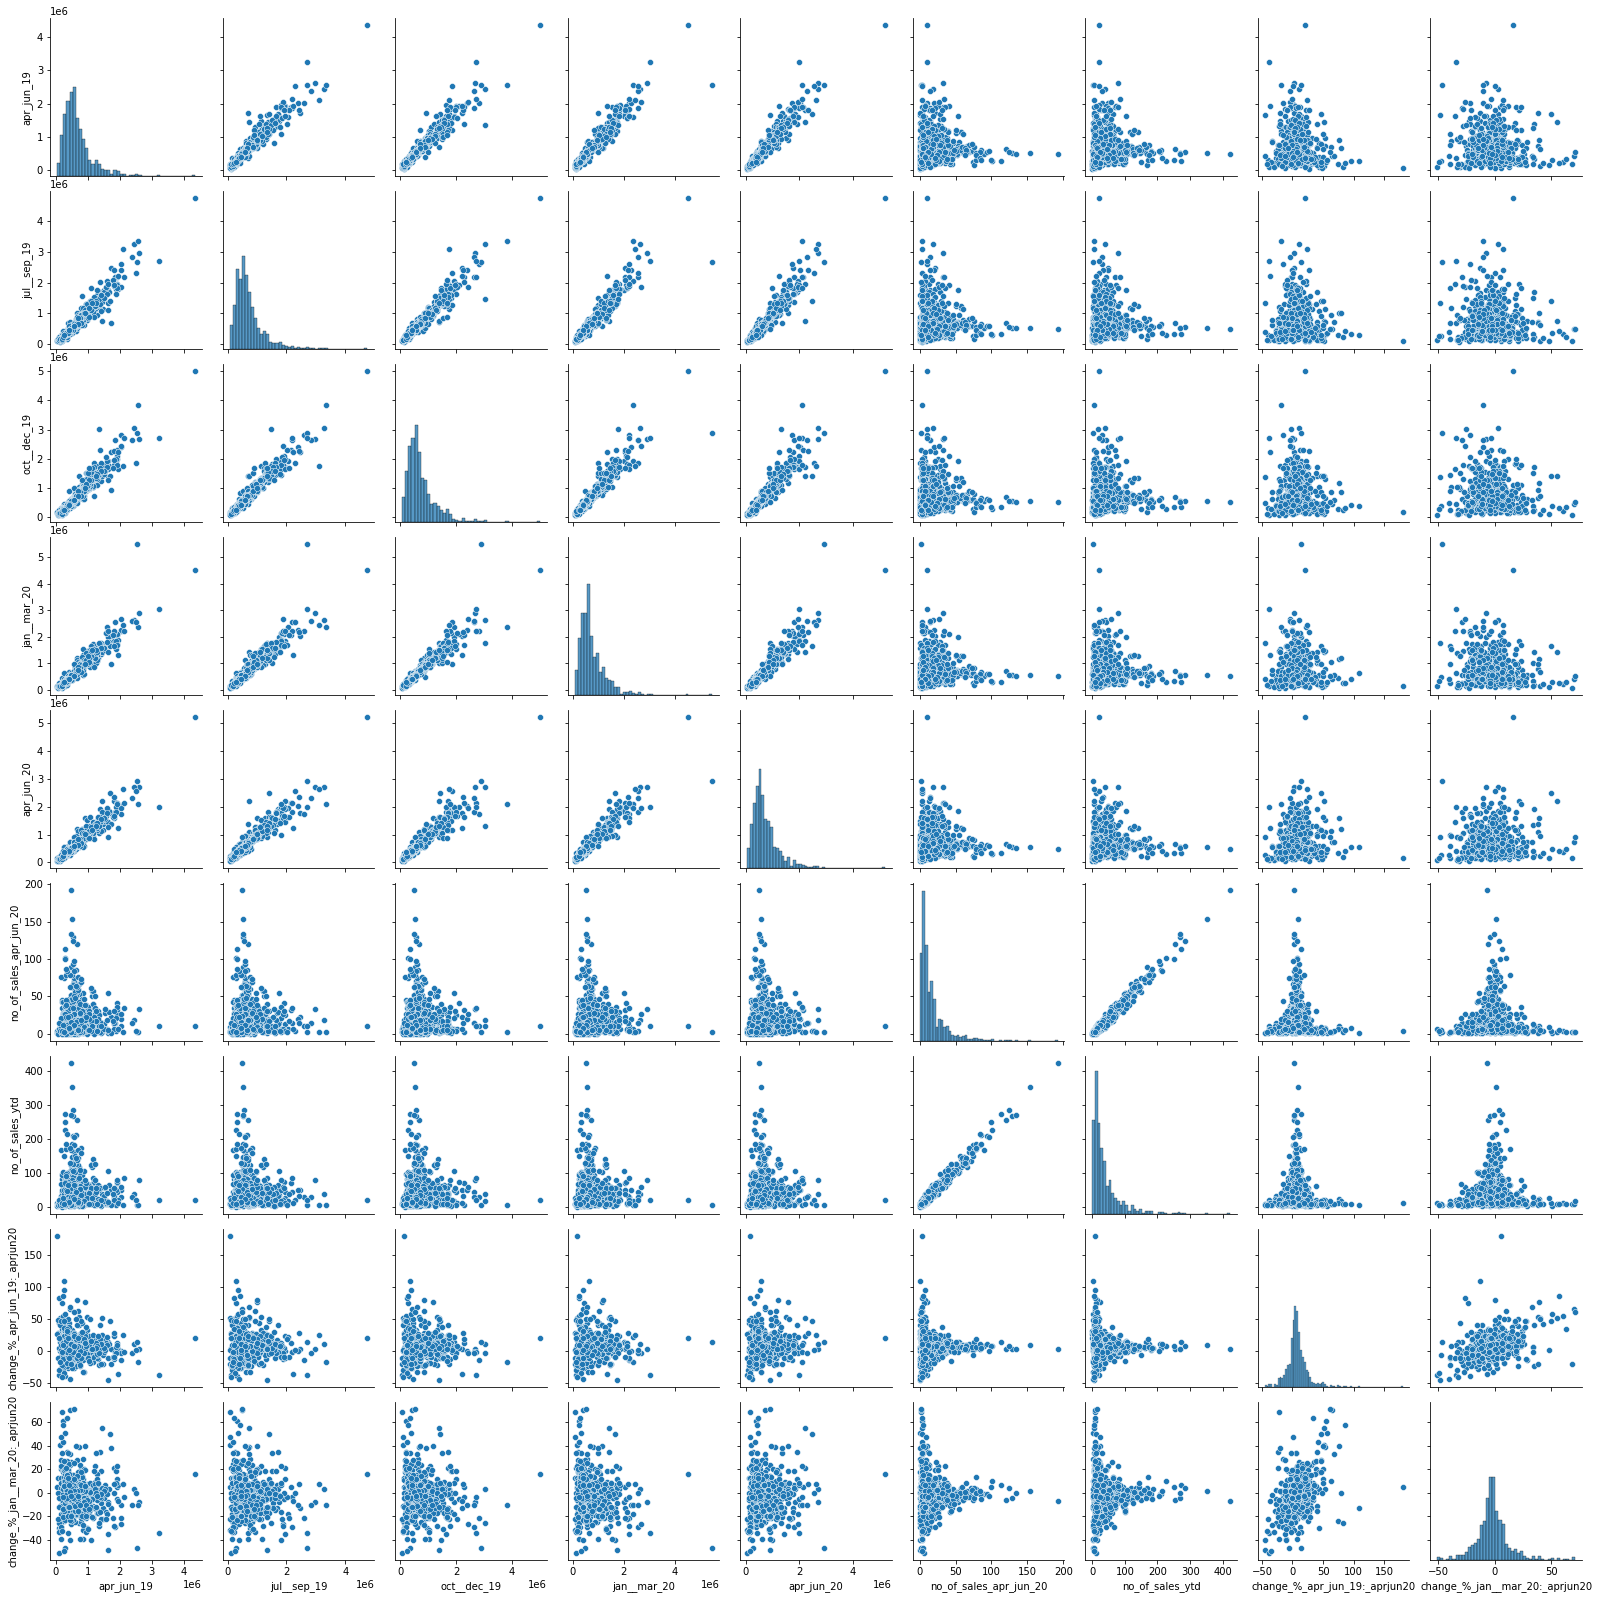

In [182]:
sns.pairplot(df_2)

In [46]:
# Looking at the pairplots - it seems to be largely positively skewed - median will be a better measure than mean
df_2.apr_jun_19.median()

573150.0

In [47]:
df_2.jul__sep_19.median()

590000.0

In [48]:
df_2.oct__dec_19.median()

610500.0

In [49]:
df_2.jan__mar_20.median()

619000.0

In [50]:
df_2.apr_jun_20.median()

600000.0

In [51]:
price_medians = np.array([577000, 592500, 611000, 620000, 600000])

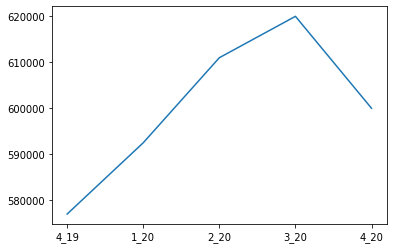

In [54]:
plt.plot(quarter, price_medians)

Investigating which suburbs have house prices < Melbourne median

In [57]:
aprjunltmed = df_2.loc[(df_2.apr_jun_19 <= 577000)]
aprjunltmed

,suburb,apr_jun_19,jul__sep_19,oct__dec_19,jan__mar_20,apr_jun_20,no_of_sales_apr_jun_20,no_of_sales_ytd,change_%_apr_jun_19:_aprjun20,change_%_jan__mar_20:_aprjun20
2,AINTREE,570000.0,575000.0,620400.0,675000.0,685000.0,23.0,44.0,20.2,1.5
5,ALBANVALE,491500.0,500000.0,517000.0,551500.0,505000.0,9.0,23.0,2.7,-8.4
8,ALEXANDRA,307500.0,285000.0,325000.0,388500.0,395000.0,11.0,29.0,28.5,1.7
9,ALFREDTON,453500.0,498000.0,485100.0,500000.0,510000.0,40.0,94.0,12.5,2.0
17,ARARAT,210000.0,219000.0,227500.0,234000.0,240000.0,35.0,83.0,14.3,2.6
...,...,...,...,...,...,...,...,...,...,...
743,YARRAGON,426000.0,425000.0,430000.0,425000.0,375000.0,7.0,12.0,-12.0,-11.8
744,YARRAM,227500.0,224000.0,249800.0,258000.0,247500.0,12.0,25.0,8.8,-4.1
746,YARRAWONGA,376000.0,372500.0,389800.0,401500.0,452500.0,22.0,63.0,20.3,12.7
747,YEA,417000.0,470500.0,420000.0,395000.0,421300.0,8.0,15.0,1.0,6.6


In [59]:
julsepltmed = aprjunltmed.loc[(aprjunltmed.jul__sep_19 <= 592500)]
julsepltmed

,suburb,apr_jun_19,jul__sep_19,oct__dec_19,jan__mar_20,apr_jun_20,no_of_sales_apr_jun_20,no_of_sales_ytd,change_%_apr_jun_19:_aprjun20,change_%_jan__mar_20:_aprjun20
2,AINTREE,570000.0,575000.0,620400.0,675000.0,685000.0,23.0,44.0,20.2,1.5
5,ALBANVALE,491500.0,500000.0,517000.0,551500.0,505000.0,9.0,23.0,2.7,-8.4
8,ALEXANDRA,307500.0,285000.0,325000.0,388500.0,395000.0,11.0,29.0,28.5,1.7
9,ALFREDTON,453500.0,498000.0,485100.0,500000.0,510000.0,40.0,94.0,12.5,2.0
17,ARARAT,210000.0,219000.0,227500.0,234000.0,240000.0,35.0,83.0,14.3,2.6
...,...,...,...,...,...,...,...,...,...,...
743,YARRAGON,426000.0,425000.0,430000.0,425000.0,375000.0,7.0,12.0,-12.0,-11.8
744,YARRAM,227500.0,224000.0,249800.0,258000.0,247500.0,12.0,25.0,8.8,-4.1
746,YARRAWONGA,376000.0,372500.0,389800.0,401500.0,452500.0,22.0,63.0,20.3,12.7
747,YEA,417000.0,470500.0,420000.0,395000.0,421300.0,8.0,15.0,1.0,6.6


In [61]:
octdecltmed = julsepltmed.loc[(julsepltmed.oct__dec_19 <= 611000)]
octdecltmed

,suburb,apr_jun_19,jul__sep_19,oct__dec_19,jan__mar_20,apr_jun_20,no_of_sales_apr_jun_20,no_of_sales_ytd,change_%_apr_jun_19:_aprjun20,change_%_jan__mar_20:_aprjun20
5,ALBANVALE,491500.0,500000.0,517000.0,551500.0,505000.0,9.0,23.0,2.7,-8.4
8,ALEXANDRA,307500.0,285000.0,325000.0,388500.0,395000.0,11.0,29.0,28.5,1.7
9,ALFREDTON,453500.0,498000.0,485100.0,500000.0,510000.0,40.0,94.0,12.5,2.0
17,ARARAT,210000.0,219000.0,227500.0,234000.0,240000.0,35.0,83.0,14.3,2.6
18,ARDEER,557500.0,575000.0,572000.0,600000.0,575000.0,3.0,11.0,3.1,-4.2
...,...,...,...,...,...,...,...,...,...,...
743,YARRAGON,426000.0,425000.0,430000.0,425000.0,375000.0,7.0,12.0,-12.0,-11.8
744,YARRAM,227500.0,224000.0,249800.0,258000.0,247500.0,12.0,25.0,8.8,-4.1
746,YARRAWONGA,376000.0,372500.0,389800.0,401500.0,452500.0,22.0,63.0,20.3,12.7
747,YEA,417000.0,470500.0,420000.0,395000.0,421300.0,8.0,15.0,1.0,6.6


In [62]:
janmarltmed = octdecltmed.loc[(octdecltmed.jan__mar_20 <= 620000)]
janmarltmed

,suburb,apr_jun_19,jul__sep_19,oct__dec_19,jan__mar_20,apr_jun_20,no_of_sales_apr_jun_20,no_of_sales_ytd,change_%_apr_jun_19:_aprjun20,change_%_jan__mar_20:_aprjun20
5,ALBANVALE,491500.0,500000.0,517000.0,551500.0,505000.0,9.0,23.0,2.7,-8.4
8,ALEXANDRA,307500.0,285000.0,325000.0,388500.0,395000.0,11.0,29.0,28.5,1.7
9,ALFREDTON,453500.0,498000.0,485100.0,500000.0,510000.0,40.0,94.0,12.5,2.0
17,ARARAT,210000.0,219000.0,227500.0,234000.0,240000.0,35.0,83.0,14.3,2.6
18,ARDEER,557500.0,575000.0,572000.0,600000.0,575000.0,3.0,11.0,3.1,-4.2
...,...,...,...,...,...,...,...,...,...,...
743,YARRAGON,426000.0,425000.0,430000.0,425000.0,375000.0,7.0,12.0,-12.0,-11.8
744,YARRAM,227500.0,224000.0,249800.0,258000.0,247500.0,12.0,25.0,8.8,-4.1
746,YARRAWONGA,376000.0,372500.0,389800.0,401500.0,452500.0,22.0,63.0,20.3,12.7
747,YEA,417000.0,470500.0,420000.0,395000.0,421300.0,8.0,15.0,1.0,6.6


In [63]:
aprjun20ltmed = janmarltmed.loc[(janmarltmed.apr_jun_20 <= 60000)]
aprjun20ltmed

,suburb,apr_jun_19,jul__sep_19,oct__dec_19,jan__mar_20,apr_jun_20,no_of_sales_apr_jun_20,no_of_sales_ytd,change_%_apr_jun_19:_aprjun20,change_%_jan__mar_20:_aprjun20
286,GOROKE,45000.0,120000.0,120000.0,120000.0,57000.0,1.0,1.0,26.6,NaN
552,RAINBOW,68100.0,85000.0,67000.0,77500.0,60000.0,3.0,9.0,-11.9,-22.6


In [71]:
aprjun20lp = aprjun20ltmed.iloc[:,1:6]
aprjun20lp

,apr_jun_19,jul__sep_19,oct__dec_19,jan__mar_20,apr_jun_20
286,45000.0,120000.0,120000.0,120000.0,57000.0
552,68100.0,85000.0,67000.0,77500.0,60000.0


In [77]:
aprjun20lp = aprjun20lp.T

In [78]:
aprjun20lp.reset_index

<bound method DataFrame.reset_index of      apr_jun_19  jul__sep_19  oct__dec_19  jan__mar_20  apr_jun_20
286     45000.0     120000.0     120000.0     120000.0     57000.0
552     68100.0      85000.0      67000.0      77500.0     60000.0>

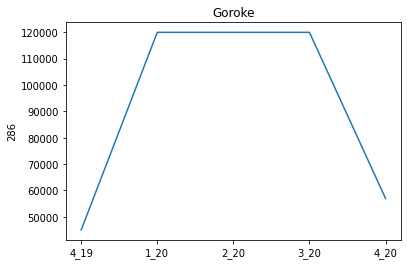

In [83]:
sns.lineplot(x=quarter, y=aprjun20lp.iloc[0]).set_title("Suburb: Goroke")

Text(0.5, 1.0, 'Suburb: Rainbow')

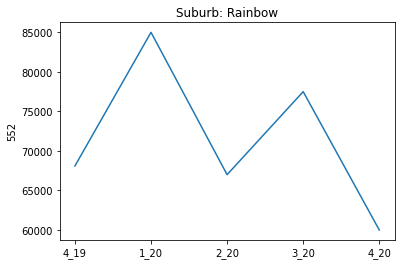

In [84]:
sns.lineplot(x=quarter, y=aprjun20lp.iloc[1]).set_title("Suburb: Rainbow")

# Investigation

Why is property so cheap in Rainbow? A: it is 400km from Melbourne.
Why is property so cheap in Goroke? A: it is 400km from Melbourne.

These are the two suburbs that fulfilled the criteria of houses prices less than Median for each quarter (without further investigating whether or not house price increased over this time - I could have filtered by (% change > 0) before investigating further to establish profitability for the time period.) This is clearly an incomplete/insufficient investigation into house prices. I will investigate again with the first 5 quarters, discounting the final quarter of house sales, as I believe covid will have altered the results such that no statistical inference can be taken from it, as it has provided an unprecedented set of circumstances affecting the housing market. These 4 quarters yield 336 suburbs where house prices are < median - far more data to work with - I will still use the % change over the 5 quarters to compare to the most current prices.

It is clear now that I am not dealing with house price data for Melbourne suburbs but of Victorian suburbs/townships/locales. I also believe that low sample size (houses sold) will be affecting the values. I will put in place a lower sales threshold of 5 houses sold to date to investigate more robust data. I will also investigate an upper house sales threshold of > sales median, so that I can further investigate the 'hot' suburbs and compare against the maxim: location, location, location. I still wish to find houses < median as I believe those represent the 'steals.' I don't believe I will find many in the suburbs with greater sales as this would represent a greater demand/competition for house sales and therefore drive up the prices.

I will therefore have: (house prices < median) in suburbs where (5 < houses sold < median): 'Hidden Treasures'
and: (house prices < median) in suburbs where (houses sold > median): 'Hot Property'

This looks a lot like a SQL query.

In [85]:
df_3 = janmarltmed
df_3.info

<bound method DataFrame.info of          suburb  apr_jun_19  jul__sep_19  oct__dec_19  jan__mar_20  \
5     ALBANVALE    491500.0     500000.0     517000.0     551500.0   
8     ALEXANDRA    307500.0     285000.0     325000.0     388500.0   
9     ALFREDTON    453500.0     498000.0     485100.0     500000.0   
17       ARARAT    210000.0     219000.0     227500.0     234000.0   
18       ARDEER    557500.0     575000.0     572000.0     600000.0   
..          ...         ...          ...          ...          ...   
743    YARRAGON    426000.0     425000.0     430000.0     425000.0   
744      YARRAM    227500.0     224000.0     249800.0     258000.0   
746  YARRAWONGA    376000.0     372500.0     389800.0     401500.0   
747         YEA    417000.0     470500.0     420000.0     395000.0   
748      YINNAR    255000.0     300000.0     223000.0     295000.0   

     apr_jun_20  no_of_sales_apr_jun_20  no_of_sales_ytd  \
5      505000.0                     9.0             23.0   
8      

In [86]:
df_3.head()

,suburb,apr_jun_19,jul__sep_19,oct__dec_19,jan__mar_20,apr_jun_20,no_of_sales_apr_jun_20,no_of_sales_ytd,change_%_apr_jun_19:_aprjun20,change_%_jan__mar_20:_aprjun20
5,ALBANVALE,491500.0,500000.0,517000.0,551500.0,505000.0,9.0,23.0,2.7,-8.4
8,ALEXANDRA,307500.0,285000.0,325000.0,388500.0,395000.0,11.0,29.0,28.5,1.7
9,ALFREDTON,453500.0,498000.0,485100.0,500000.0,510000.0,40.0,94.0,12.5,2.0
17,ARARAT,210000.0,219000.0,227500.0,234000.0,240000.0,35.0,83.0,14.3,2.6
18,ARDEER,557500.0,575000.0,572000.0,600000.0,575000.0,3.0,11.0,3.1,-4.2


In [87]:
df_3.no_of_sales_ytd.median()

22.0

## 'Hidden Treasure' Properties

In [90]:
df_HT = df_3.loc[(df_3.no_of_sales_ytd >= 5) & (df_3.no_of_sales_ytd <= 22)]
df_HT

,suburb,apr_jun_19,jul__sep_19,oct__dec_19,jan__mar_20,apr_jun_20,no_of_sales_apr_jun_20,no_of_sales_ytd,change_%_apr_jun_19:_aprjun20,change_%_jan__mar_20:_aprjun20
18,ARDEER,557500.0,575000.0,572000.0,600000.0,575000.0,3.0,11.0,3.1,-4.2
28,AVENEL,387000.0,351000.0,370000.0,445000.0,535000.0,5.0,6.0,38.2,20.2
29,AVOCA,180000.0,160000.0,230000.0,265000.0,160000.0,3.0,12.0,-11.1,-39.6
32,BADGER CREEK,442500.0,435000.0,498000.0,530000.0,572500.0,3.0,6.0,29.4,8.0
44,BANDIANA,350000.0,365000.0,400300.0,369000.0,456300.0,2.0,7.0,30.4,23.6
...,...,...,...,...,...,...,...,...,...,...
736,WYCHEPROOF,197500.0,124500.0,100000.0,170000.0,115000.0,3.0,6.0,-41.8,-32.4
740,YALLOURN NORTH,205000.0,172500.0,213000.0,150000.0,200500.0,4.0,11.0,-2.2,33.7
743,YARRAGON,426000.0,425000.0,430000.0,425000.0,375000.0,7.0,12.0,-12.0,-11.8
747,YEA,417000.0,470500.0,420000.0,395000.0,421300.0,8.0,15.0,1.0,6.6


In [92]:
df_HT.isnull().sum()

suburb                            0
apr_jun_19                        0
jul__sep_19                       0
oct__dec_19                       0
jan__mar_20                       0
apr_jun_20                        0
no_of_sales_apr_jun_20            0
no_of_sales_ytd                   0
change_%_apr_jun_19:_aprjun20     6
change_%_jan__mar_20:_aprjun20    8
dtype: int64

In [164]:
df_HT.iloc[:,8].isnull().sum()

6

In [174]:
#Trying to impute the values that are missing by recreating the percentage column with the quarterly data
df_HT.loc[:,('apr_jun_19', 'apr_jun_20')] = df_HT['percent_change']

KeyError: 'percent_change'

In [195]:
df_HT['percent_change_final'] = ((df_HT['apr_jun_20']-df_HT['apr_jun_19'])/df_HT['apr_jun_19'])*100
#This is the formula that worked - error thrown was a SettingWithCopyWarning

<ipython-input-195-7ec0ee15b53f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_HT['percent_change_final'] = ((df_HT['apr_jun_20']-df_HT['apr_jun_19'])/df_HT['apr_jun_19'])*100


In [177]:
df_1['percent_change'] = df_1['apr_jun_19']/df_1['apr_jun_20']

KeyError: 'apr_jun_19'

In [180]:
df['percent_change'] = df.loc[:,('apr_jun_20', 'apr_jun_19')]

KeyError: "None of [Index(['apr_jun_19', 'apr_jun_20'], dtype='object')] are in the [columns]"

I am unable to rectify the 6 nan values in the percentage change column for the past year(5 quarters) as jupyter is giving me a view/copy error. I have gone back to earlier dataframes to see if I can calculate but I will ask in class about it to gain and understanding of the error further. 

I will ignore the 6 nan values and continue the statistical investigating into the Hidden Treasure properties

**It turns out that I had actually calculated a percent change column and added it to the dataframe** - commented in  cell above

In [196]:
#Sorting the columns by how well they did - percent change
df_HT_sorted = df_HT.sort_values(by=['change_%_apr_jun_19:_aprjun20', 'no_of_sales_ytd'], ascending=False)
df_HT_sorted
#I ran this cell again after running the drop columns below, without changing the name - the percentage_change_ytd, percent_change columns won't show up when this cell is run again.

,suburb,apr_jun_19,jul__sep_19,oct__dec_19,jan__mar_20,apr_jun_20,no_of_sales_apr_jun_20,no_of_sales_ytd,change_%_apr_jun_19:_aprjun20,change_%_jan__mar_20:_aprjun20,percent_change_ytd,percent_change,percent_change_final
321,HOPETOUN,60000.0,91300.0,152000.0,160000.0,168000.0,4.0,10.0,180.0,5.0,60000.0,0.357143,180.000000
76,BLACKWOOD,277500.0,340000.0,405000.0,405000.0,542500.0,8.0,8.0,95.5,NaN,277500.0,0.511521,95.495495
604,SMYTHESDALE,227800.0,410000.0,290000.0,270500.0,425000.0,5.0,7.0,86.6,57.1,227800.0,0.536000,86.567164
524,PARADISE BEACH,100000.0,212000.0,235000.0,248000.0,183000.0,3.0,8.0,83.0,-26.2,100000.0,0.546448,83.000000
406,LUCKNOW,190000.0,282000.0,265000.0,435000.0,331500.0,6.0,11.0,74.5,-23.8,190000.0,0.573152,74.473684
...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,SANDY POINT,385000.0,410000.0,445000.0,517500.0,517500.0,0.0,10.0,NaN,NaN,385000.0,0.743961,34.415584
485,NEERIM SOUTH,476500.0,375000.0,520000.0,577500.0,425000.0,5.0,9.0,NaN,-26.4,476500.0,1.121176,-10.807975
445,MINYIP,139000.0,64500.0,140000.0,95000.0,65300.0,4.0,8.0,NaN,-31.3,139000.0,2.128637,-53.021583
518,OMEO,233800.0,305000.0,242500.0,238000.0,238000.0,0.0,5.0,NaN,NaN,233800.0,0.982353,1.796407


In [201]:
#Dropping columns that I erroneously added to the df without realising
df_HT_sorted = df_HT_sorted.drop(['percent_change_ytd','percent_change','change_%_jan__mar_20:_aprjun20'], axis=1)
df_HT_sorted

KeyError: "['percent_change_ytd' 'percent_change' 'change_%_jan__mar_20:_aprjun20'] not found in axis"

In [202]:
#Sorting the suburbs by 
df_HT_top5 = df_HT_sorted.iloc[0:5]
df_HT_top5

,suburb,apr_jun_19,jul__sep_19,oct__dec_19,jan__mar_20,apr_jun_20,no_of_sales_apr_jun_20,no_of_sales_ytd,change_%_apr_jun_19:_aprjun20,percent_change_final
321,HOPETOUN,60000.0,91300.0,152000.0,160000.0,168000.0,4.0,10.0,180.0,180.000000
76,BLACKWOOD,277500.0,340000.0,405000.0,405000.0,542500.0,8.0,8.0,95.5,95.495495
604,SMYTHESDALE,227800.0,410000.0,290000.0,270500.0,425000.0,5.0,7.0,86.6,86.567164
524,PARADISE BEACH,100000.0,212000.0,235000.0,248000.0,183000.0,3.0,8.0,83.0,83.000000
406,LUCKNOW,190000.0,282000.0,265000.0,435000.0,331500.0,6.0,11.0,74.5,74.473684


In [203]:
#Setting the index as suburb so I can graph the results
df_HT_top5_lp = df_HT_top5.set_index('suburb')
df_HT_top5_lp

,apr_jun_19,jul__sep_19,oct__dec_19,jan__mar_20,apr_jun_20,no_of_sales_apr_jun_20,no_of_sales_ytd,change_%_apr_jun_19:_aprjun20,percent_change_final
suburb,,,,,,,,,
HOPETOUN,60000.0,91300.0,152000.0,160000.0,168000.0,4.0,10.0,180.0,180.000000
BLACKWOOD,277500.0,340000.0,405000.0,405000.0,542500.0,8.0,8.0,95.5,95.495495
SMYTHESDALE,227800.0,410000.0,290000.0,270500.0,425000.0,5.0,7.0,86.6,86.567164
PARADISE BEACH,100000.0,212000.0,235000.0,248000.0,183000.0,3.0,8.0,83.0,83.000000
LUCKNOW,190000.0,282000.0,265000.0,435000.0,331500.0,6.0,11.0,74.5,74.473684


In [205]:
#Dropping extra columns to be able to generate a lineplot
df_HT_top5_lp = df_HT_top5_lp.iloc[:,0:5]
df_HT_top5_lp

,apr_jun_19,jul__sep_19,oct__dec_19,jan__mar_20,apr_jun_20
suburb,,,,,
HOPETOUN,60000.0,91300.0,152000.0,160000.0,168000.0
BLACKWOOD,277500.0,340000.0,405000.0,405000.0,542500.0
SMYTHESDALE,227800.0,410000.0,290000.0,270500.0,425000.0
PARADISE BEACH,100000.0,212000.0,235000.0,248000.0,183000.0
LUCKNOW,190000.0,282000.0,265000.0,435000.0,331500.0


In [206]:
#Transcribing data to generate lineplot
df_HT_top5_lpT = df_HT_top5_lp.T
df_HT_top5_lpT

suburb,HOPETOUN,BLACKWOOD,SMYTHESDALE,PARADISE BEACH,LUCKNOW
apr_jun_19,60000.0,277500.0,227800.0,100000.0,190000.0
jul__sep_19,91300.0,340000.0,410000.0,212000.0,282000.0
oct__dec_19,152000.0,405000.0,290000.0,235000.0,265000.0
jan__mar_20,160000.0,405000.0,270500.0,248000.0,435000.0
apr_jun_20,168000.0,542500.0,425000.0,183000.0,331500.0


Text(0.5, 1.0, "Top 5 'Hidden Treasure' Property Areas")

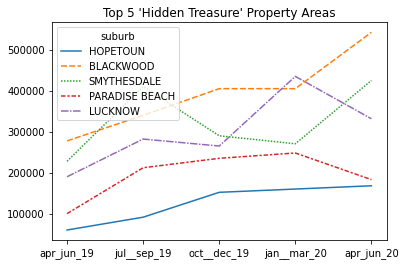

In [208]:
sns.lineplot(data=df_HT_top5_lpT).set_title("Top 5 'Hidden Treasure' Property Areas")

Based on this data, I would buy in Blackwood or Smythesdale, as they have the second and third highest percentage growth but look like they have a greater absolute growth amount (approximately $270,000 and $200,000) over the year. Another investigation would be to look at absolute growth compared to relative (percentage) growth, but that's not what my initial business question was. 

In [210]:
#Looking at the distance of these top 5 suburbs from Melbourne out of interest
top_5_HT_dist = np.array([['Hopetoun','Blackwood','Smythesdale','Paradise Beach','Lucknow'], [400,89,135,250,280]]).T
top_5_HT_dist

array([['Hopetoun', '400'],
       ['Blackwood', '89'],
       ['Smythesdale', '135'],
       ['Paradise Beach', '250'],
       ['Lucknow', '280']], dtype='<U14')

In [213]:
top_5_HT_dist_df = pd.DataFrame(top_5_HT_dist, columns=['Suburb', 'Distance from Melbourne'])
top_5_HT_dist_df

,Suburb,Distance from Melbourne
0,Hopetoun,400
1,Blackwood,89
2,Smythesdale,135
3,Paradise Beach,250
4,Lucknow,280


## 'Hot Property' Properties

In [91]:
df_HP = df_3.loc[(df_3.no_of_sales_ytd >= 22)]
df_HP

,suburb,apr_jun_19,jul__sep_19,oct__dec_19,jan__mar_20,apr_jun_20,no_of_sales_apr_jun_20,no_of_sales_ytd,change_%_apr_jun_19:_aprjun20,change_%_jan__mar_20:_aprjun20
5,ALBANVALE,491500.0,500000.0,517000.0,551500.0,505000.0,9.0,23.0,2.7,-8.4
8,ALEXANDRA,307500.0,285000.0,325000.0,388500.0,395000.0,11.0,29.0,28.5,1.7
9,ALFREDTON,453500.0,498000.0,485100.0,500000.0,510000.0,40.0,94.0,12.5,2.0
17,ARARAT,210000.0,219000.0,227500.0,234000.0,240000.0,35.0,83.0,14.3,2.6
20,ARMSTRONG CREEK,530000.0,540000.0,527500.0,530500.0,550000.0,35.0,87.0,3.8,3.7
...,...,...,...,...,...,...,...,...,...,...
733,WOOLAMAI WATERS,495300.0,447500.0,512500.0,575000.0,460000.0,16.0,29.0,-7.1,-20.0
734,WOORI YALLOCK,532500.0,450000.0,570000.0,552200.0,525000.0,10.0,29.0,-1.4,-4.9
737,WYNDHAM VALE,457500.0,465000.0,485000.0,470300.0,472000.0,63.0,129.0,3.2,0.4
744,YARRAM,227500.0,224000.0,249800.0,258000.0,247500.0,12.0,25.0,8.8,-4.1


In [93]:
#No null values
df_HP.isnull().sum()

suburb                            0
apr_jun_19                        0
jul__sep_19                       0
oct__dec_19                       0
jan__mar_20                       0
apr_jun_20                        0
no_of_sales_apr_jun_20            0
no_of_sales_ytd                   0
change_%_apr_jun_19:_aprjun20     0
change_%_jan__mar_20:_aprjun20    0
dtype: int64

In [99]:
#Sorting by performance
df_HP_sorted = df_HP.sort_values(by=['change_%_apr_jun_19:_aprjun20', 'no_of_sales_ytd'], ascending=False)
df_HP_sorted

,suburb,apr_jun_19,jul__sep_19,oct__dec_19,jan__mar_20,apr_jun_20,no_of_sales_apr_jun_20,no_of_sales_ytd,change_%_apr_jun_19:_aprjun20,change_%_jan__mar_20:_aprjun20
375,KORUMBURRA,301000.0,326500.0,316300.0,378000.0,394000.0,18.0,37.0,30.9,4.2
8,ALEXANDRA,307500.0,285000.0,325000.0,388500.0,395000.0,11.0,29.0,28.5,1.7
670,TRAFALGAR,370000.0,407500.0,382500.0,410000.0,470000.0,13.0,28.0,27.0,14.6
479,MYRTLEFORD,295000.0,296000.0,332500.0,351300.0,370000.0,13.0,29.0,25.4,5.3
597,SEYMOUR,275000.0,285000.0,312500.0,310000.0,340000.0,21.0,48.0,23.6,9.7
...,...,...,...,...,...,...,...,...,...,...
648,TATURA,369000.0,282000.0,272500.0,275000.0,298300.0,20.0,40.0,-19.2,8.5
629,STRATHDALE,492500.0,467000.0,490000.0,521000.0,397500.0,16.0,39.0,-19.3,-23.7
333,IRYMPLE,380000.0,418000.0,393000.0,307500.0,278000.0,14.0,32.0,-26.8,-9.6
129,CASTERTON,165000.0,170000.0,122500.0,161500.0,120000.0,8.0,22.0,-27.3,-25.7


In [123]:
#Taking the top 5 suburbs to generate lineplot
df_HP_top5 = df_HP_sorted.iloc[0:5]
df_HP_top5

,suburb,apr_jun_19,jul__sep_19,oct__dec_19,jan__mar_20,apr_jun_20,no_of_sales_apr_jun_20,no_of_sales_ytd,change_%_apr_jun_19:_aprjun20,change_%_jan__mar_20:_aprjun20
375,KORUMBURRA,301000.0,326500.0,316300.0,378000.0,394000.0,18.0,37.0,30.9,4.2
8,ALEXANDRA,307500.0,285000.0,325000.0,388500.0,395000.0,11.0,29.0,28.5,1.7
670,TRAFALGAR,370000.0,407500.0,382500.0,410000.0,470000.0,13.0,28.0,27.0,14.6
479,MYRTLEFORD,295000.0,296000.0,332500.0,351300.0,370000.0,13.0,29.0,25.4,5.3
597,SEYMOUR,275000.0,285000.0,312500.0,310000.0,340000.0,21.0,48.0,23.6,9.7


In [125]:
df_HP_top5_lp = df_HP_top5.set_index('suburb')

In [130]:
#Shortening data to generate lineplot
df_HP_top5_lp = df_HP_top5_lp.iloc[:,0:5]
df_HP_top5_lp

,apr_jun_19,jul__sep_19,oct__dec_19,jan__mar_20,apr_jun_20
suburb,,,,,
KORUMBURRA,301000.0,326500.0,316300.0,378000.0,394000.0
ALEXANDRA,307500.0,285000.0,325000.0,388500.0,395000.0
TRAFALGAR,370000.0,407500.0,382500.0,410000.0,470000.0
MYRTLEFORD,295000.0,296000.0,332500.0,351300.0,370000.0
SEYMOUR,275000.0,285000.0,312500.0,310000.0,340000.0


Text(0.5, 1.0, 'Top 5 Hot Property Areas')

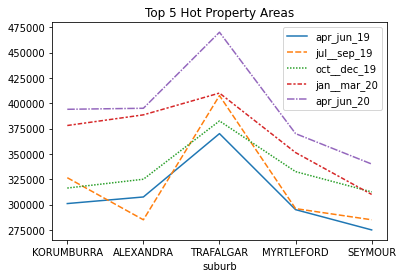

In [131]:
sns.lineplot(data=df_HP_top5_lp).set_title("Top 5 Hot Property Areas")
#Incorrect lineplot of house prices over time

In [133]:
#Transcribe to show correct lineplot
df_HP_top5_lpT = df_HP_top5_lp.T
df_HP_top5_lpT

suburb,KORUMBURRA,ALEXANDRA,TRAFALGAR,MYRTLEFORD,SEYMOUR
apr_jun_19,301000.0,307500.0,370000.0,295000.0,275000.0
jul__sep_19,326500.0,285000.0,407500.0,296000.0,285000.0
oct__dec_19,316300.0,325000.0,382500.0,332500.0,312500.0
jan__mar_20,378000.0,388500.0,410000.0,351300.0,310000.0
apr_jun_20,394000.0,395000.0,470000.0,370000.0,340000.0


Text(0.5, 1.0, 'Top 5 Hot Property Areas')

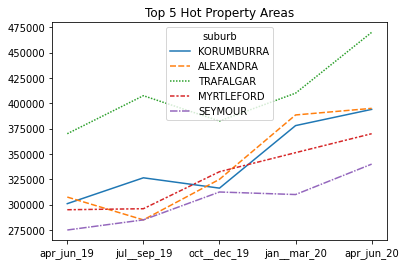

In [138]:
sns.lineplot(data=df_HP_top5_lpT).set_title("Top 5 Hot Property Areas")


Based on this graph I would purchase in any of these suburbs/areas as they all seem to have similar growth profiles. Trafalgar looks to have the highest recent growth, even though it has the third highest percentage increase over the period.

Looking at the distances from Melbourne - they all seem to be a similar distance which points to those areas within 1-2 hrs of Melbourne as most desirable.

In [115]:
top_5_dist = np.array([['Korumburra','Alexandra','Trafalgar','Myrtleford','Seymour'], [120,130,124,280,104]]).T
top_5_dist

array([['Korumburra', '120'],
       ['Alexandra', '130'],
       ['Trafalgar', '124'],
       ['Myrtleford', '280'],
       ['Seymour', '104']], dtype='<U10')

In [116]:
top_5_dist_df = pd.DataFrame(top_5, columns=['Suburb', 'Distance from Melbourne'])

In [117]:
top_5_dist_df

,Suburb,Distance from Melbourne
0,Korumburra,120
1,Alexandra,130
2,Trafalgar,124
3,Myrtleford,280
4,Seymour,104


# Conclusion

I have investigated the best performing houses by suburb, based on percentage increase over the past five quarters and within the criteria that I have designated an 'Investor's Dream.' (Whether or not I am correct is another matter.)

Further investigations would include: greatest absolute increase in sale price(but a higher buy in price,) looking at the suburbs where the sale price is > median and year to date sale numbers are > median, distance from Melbourne applied to the whole dataset with a correlation of house price and distance from Melbourne and perhaps a Heatmap of where house price performance has been the greatest over the given period. 